<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import numpy as np
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_csv('/datasets/real_estate_data.csv')
df.columns

# Данные разделены знаком табуляции, поправим это.
df = pd.read_csv ('/datasets/real_estate_data.csv', sep='\t')
df.info()
df.head()

display(df[df['locality_name'].isna()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.00,81.70,2016-04-15T00:00:00,3,3.55,5.00,50.80,2,NaN,...,8.80,0.00,NaN,23478.00,4258.00,0.00,NaN,0.00,NaN,147.00
2033,6,5398000.00,80.00,2017-05-30T00:00:00,3,NaN,4.00,42.60,2,NaN,...,18.60,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.00
2603,20,3351765.00,42.70,2015-09-20T00:00:00,1,NaN,24.00,15.60,3,NaN,...,10.70,0.00,NaN,22041.00,17369.00,0.00,NaN,1.00,374.00,276.00
2632,2,5130593.00,62.40,2015-10-11T00:00:00,2,NaN,24.00,33.10,21,NaN,...,8.20,0.00,NaN,22041.00,17369.00,0.00,NaN,1.00,374.00,256.00
3574,10,4200000.00,46.50,2016-05-28T00:00:00,2,NaN,5.00,30.80,5,NaN,...,6.50,0.00,NaN,27419.00,8127.00,0.00,NaN,1.00,603.00,45.00
4151,17,17600000.00,89.50,2014-12-09T00:00:00,2,3.00,8.00,39.62,7,NaN,...,13.38,0.00,NaN,25054.00,3902.00,1.00,485.00,3.00,722.00,869.00
4189,7,9200000.00,80.00,2015-12-10T00:00:00,3,4.00,4.00,52.30,3,False,...,10.40,0.00,NaN,21774.00,3039.00,1.00,690.00,1.00,953.00,223.00
4670,1,5500000.00,83.00,2015-08-14T00:00:00,3,NaN,7.00,NaN,6,NaN,...,NaN,0.00,NaN,26534.00,5382.00,1.00,446.00,1.00,376.00,350.00
5343,19,13540000.00,85.50,2016-01-20T00:00:00,3,NaN,7.00,59.10,5,False,...,8.30,4.00,NaN,10556.00,9538.00,1.00,67.00,0.00,NaN,303.00
5707,7,3700000.00,30.00,2016-04-29T00:00:00,1,NaN,24.00,20.00,23,NaN,...,NaN,0.00,NaN,21460.00,16788.00,0.00,NaN,1.00,170.00,49.00


### Вывод

Данные разделены знаком табуляции, поправим это сразу. 

В большинстве столбцов не тот тип данных. 

Излишняя информация, такая, как время 00:00:00 в 'first_day_exposition' и высокая точность расстояния до аэропорта и центра.

Есть много пропусков.  Количество пропусков в 'parks_around3000' и 'ponds_around3000' совпадает и почти совпадает с 'cityCenters_nearest' и 'airports_nearest'.

## Предобработка данных

In [2]:
# Приведём названия столбцов к одному виду. Выбивается большая буква и слитное написание в 'cityCenters_nearest'
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

print('Количество продаж в день размещения: ', df[df['days_exposition'] == 0]) 
#Нет нулей, можем заменить пропуски в этом столбце нулями и перевести тип в 'int'

# Удалим строки с пропусками в 'locality_name' и заполним пропуска в других столбцах
df['locality_name'].dropna()
df.dropna(subset = ['locality_name'], inplace = True)
df['balcony'] = df['balcony'].fillna(0)
#df['days_exposition'] = df['days_exposition'].fillna(0)
df['floors_total'] = df['floors_total'].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna(False)


df['balcony'] = df['balcony'].astype('int')
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
#df['days_exposition'] = df['days_exposition'].astype('int')
display(df.head())

Количество продаж в день размещения:  Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000,40.40,2018-12-04T00:00:00,1,NaN,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000,56.00,2015-08-20T00:00:00,2,NaN,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000,159.00,2015-07-24T00:00:00,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


Посмотрим подробнее на разброс цены

In [3]:
print('Минимальная цена:', df['last_price'].min())
print('Максимальная цена:', df['last_price'].max())
print('Топ 5 самых дешёвых квартир:')
display(df.query('last_price < 500000').sort_values(by='last_price').head())
print('Средняя на квартиры схожей площади: {:.1f} млн'.format(df.query('105 < total_area < 115')['last_price'].mean() / 1000000))
print('Медианная на квартиры схожей площади: {:.1f} млн'.format(df.query('105 < total_area < 115')['last_price'].median() / 1000000))

Минимальная цена: 12190
Максимальная цена: 763000000
Топ 5 самых дешёвых квартир:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.00,2019-03-20T00:00:00,2,2.75,25,32.00,25,False,...,40.50,0,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,NaN,8.00
14911,5,430000,54.00,2018-06-26T00:00:00,2,NaN,3,NaN,3,False,...,NaN,0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.00
17456,7,430000,30.40,2019-04-22T00:00:00,1,NaN,2,16.00,1,False,...,6.00,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16274,18,440000,40.00,2018-07-10T00:00:00,1,NaN,5,NaN,1,False,...,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.00
5698,7,450000,42.00,2017-07-31T00:00:00,2,NaN,1,23.00,1,False,...,5.80,0,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.00


Средняя на квартиры схожей площади: 14.1 млн
Медианная на квартиры схожей площади: 12.6 млн


Предполагая, что 12190 - это 12 190 000, сделаем замену и переведем цену в миллионы. Также округлим даты до дня.

In [4]:
df[df['last_price'] == 12190]['last_price'] = 12190000 
df['last_price'] = df['last_price'] / 1000000
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'] = df['first_day_exposition'].dt.round(
    '1d'
)
df.head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_7544/2563935108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['last_price'] == 12190]['last_price'] = 12190000


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3.35,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5.20,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64.90,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [5]:
print('Пропуски в days_exposition всего:', len(df[df['days_exposition'].isna()])) 
print('Пропуски в days_exposition в 2019г:', len(df[(df['days_exposition'].isna()) & (df['first_day_exposition'] > '2019-01-01')])) 
print('Пропуски в days_exposition в 2018-2019г:', len(df[(df['days_exposition'].isna()) & (df['first_day_exposition'] > '2018-01-01')]))
print('Пропуски в days_exposition до 2018г:')
display(df[(df['days_exposition'].isna()) & (df['first_day_exposition'] <= '2017-12-31')].head(10))
df['days_exposition'] = df['days_exposition'].fillna(0)
df['days_exposition'] = df['days_exposition'].astype('int')

Пропуски в days_exposition всего: 3180
Пропуски в days_exposition в 2019г: 1794
Пропуски в days_exposition в 2018-2019г: 2754
Пропуски в days_exposition до 2018г:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
52,20,11.79,136.00,2017-09-22,6,3.00,2,94.00,2,False,...,11.00,1,Санкт-Петербург,16510.00,6582.00,1.00,526.00,0.00,NaN,NaN
108,9,9.49,80.00,2017-10-30,3,2.55,10,46.00,7,False,...,11.00,1,Санкт-Петербург,35958.00,9860.00,0.00,NaN,0.00,NaN,NaN
173,15,11.00,97.90,2017-04-11,3,2.75,16,57.70,3,False,...,14.70,1,Санкт-Петербург,14069.00,12621.00,0.00,NaN,0.00,NaN,NaN
181,2,7.90,71.80,2017-08-23,3,3.00,5,38.70,1,False,...,12.00,0,Санкт-Петербург,22036.00,3301.00,0.00,NaN,1.00,585.00,NaN
223,20,2.35,35.40,2017-12-12,1,2.60,5,18.20,1,False,...,9.80,0,деревня Лесколово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,17,19.80,118.00,2017-12-15,3,2.80,25,62.00,3,False,...,21.50,0,Санкт-Петербург,36827.00,12348.00,1.00,485.00,1.00,474.00,NaN
259,6,0.90,30.00,2017-11-21,1,2.50,5,15.00,4,False,...,5.00,1,Ивангород,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,8,17.25,102.40,2014-12-09,3,NaN,8,53.20,3,False,...,19.30,1,Санкт-Петербург,39393.00,11096.00,1.00,537.00,0.00,NaN,NaN
263,12,39.90,140.60,2016-11-19,2,3.50,8,39.80,7,False,...,49.20,4,Санкт-Петербург,32537.00,6589.00,0.00,NaN,3.00,99.00,NaN
354,20,7.03,42.60,2017-11-20,2,2.70,11,29.00,2,False,...,10.00,0,Санкт-Петербург,34496.00,15595.00,1.00,513.00,3.00,222.00,NaN


Посмотрим столбец 'ceiling_height'

In [6]:
print('Минимальная высота потолка:', df['ceiling_height'].min()) 
print('Максимальная высота потолка:',df['ceiling_height'].max())

print('Низкие потолки:')
display(df[df['ceiling_height'] <= 2])
print('Высокие потолки:')
display(df[df['ceiling_height'] >= 5.5])
print('Пропуски:')
display(df[df['ceiling_height'].isnull()])

Минимальная высота потолка: 1.0
Максимальная высота потолка: 100.0
Низкие потолки:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,3.00,33.50,2017-03-30,1,2.00,15,17.50,6,False,...,6.50,0,Санкт-Петербург,33972.00,11746.00,1.00,520.00,1.00,949.00,270
2572,4,2.40,62.00,2018-12-27,3,2.00,5,40.00,4,False,...,6.00,1,Луга,NaN,NaN,NaN,NaN,NaN,NaN,0
4212,1,2.12,35.43,2017-12-18,1,2.00,18,16.60,9,False,...,8.80,2,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36
5712,5,1.50,42.80,2017-08-14,2,1.20,2,27.50,1,False,...,5.20,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248
5850,9,1.65,35.50,2018-05-29,1,2.00,5,NaN,5,False,...,NaN,0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100
11352,4,3.30,36.00,2017-06-18,1,2.00,17,15.20,12,False,...,10.10,0,посёлок Металлострой,25268.00,26980.00,0.00,NaN,0.00,NaN,53
16446,6,12.30,88.30,2019-03-12,3,2.00,5,63.90,2,False,...,12.00,0,Санкт-Петербург,38415.00,7675.00,1.00,568.00,1.00,154.00,0
16884,0,1.50,33.00,2018-10-03,1,2.00,5,20.00,5,False,...,6.00,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6
16934,5,4.10,40.00,2017-10-17,1,1.75,37,17.40,5,False,...,8.34,0,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,71
19098,7,2.70,56.00,2018-02-04,3,2.00,5,46.00,1,False,...,6.00,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282


Высокие потолки:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3.60,55.20,2018-07-12,2,25.00,5,32.00,2,False,...,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259
1388,20,59.80,399.00,2015-01-21,5,5.60,6,NaN,6,False,...,NaN,0,Санкт-Петербург,26204.00,6934.00,2.00,149.00,2.00,577.00,719
3148,14,2.90,75.00,2018-11-12,3,32.00,3,53.00,2,False,...,8.00,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,0
3474,3,1.40,30.00,2018-03-16,1,8.00,5,15.30,2,False,...,7.30,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125
4643,0,4.30,45.00,2018-02-01,2,25.00,9,30.00,2,False,...,7.00,1,Санкт-Петербург,12016.00,13256.00,1.00,658.00,1.00,331.00,181
4876,7,3.00,25.00,2017-09-27,0,27.00,25,17.00,17,False,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28
5076,0,3.85,30.50,2018-10-03,1,24.00,5,19.50,1,True,...,5.50,0,Санкт-Петербург,29686.00,8389.00,3.00,397.00,1.00,578.00,7
5246,0,2.50,54.00,2017-10-13,2,27.00,5,30.00,3,False,...,9.00,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540
5669,4,4.40,50.00,2017-08-08,2,26.00,9,21.30,3,False,...,7.00,2,Санкт-Петербург,28981.00,10912.00,1.00,305.00,0.00,NaN,267
5807,17,8.15,80.00,2019-01-09,2,27.00,36,41.00,13,False,...,12.00,5,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,38


Пропуски:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3.35,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81
2,10,5.20,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558
3,0,64.90,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424
5,10,2.89,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55
6,6,3.70,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3.20,39.00,2017-12-16,1,NaN,9,20.00,6,False,...,11.00,2,Санкт-Петербург,40837.00,16704.00,0.00,NaN,0.00,NaN,38
23690,3,5.50,52.00,2018-07-19,2,NaN,5,31.00,2,False,...,6.00,0,Санкт-Петербург,20151.00,6263.00,1.00,300.00,0.00,NaN,15
23692,2,1.35,30.00,2017-07-07,1,NaN,5,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413
23695,14,3.10,59.00,2018-01-15,3,NaN,5,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45


Здесь очевидной замены для пропусков нет, но есть странные значения. Значения выше 20 м поделим на 10 и получим реалистичный результат. Пропуски пока никак не заменяем.

In [7]:
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] /= 10 
print('Максимальная высота потолка:',df['ceiling_height'].max())
df.head()

Максимальная высота потолка: 14.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,0
1,7,3.35,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81
2,10,5.20,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558
3,0,64.90,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424
4,2,10.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121


Проверим на наличие дубликатов и выведем общие отредактированные данные:

In [8]:
print(df.duplicated().sum())
df.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony       

In [9]:
print('Пропусков в парках в районе 3 км:', len(df[df['parks_around3000'].isnull()]))
print('Нулей в парках в районе 3 км:', len(df[df['parks_around3000'] == 0]))
print('Пропусков в ближайших парках:', len(df[(df['parks_nearest'].isnull())]))
print('Пропусков в ближайших парках из-за того, что пропуски в парках в районе 3 км:', len(df[(df['parks_nearest'].isnull()) & (df['parks_around3000'] == 0)]))
print('Отображение странных 4 объявлений, где есть расстояние до ближайшего, но в радиусе трёх км парков нет')
display(df[(df['parks_nearest'].notna()) & (df['parks_around3000'] == 0)][['parks_nearest','parks_around3000']])

Пропусков в парках в районе 3 км: 5510
Нулей в парках в районе 3 км: 10080
Пропусков в ближайших парках: 15586
Пропусков в ближайших парках из-за того, что пропуски в парках в районе 3 км: 10076
Отображение странных 4 объявлений, где есть расстояние до ближайшего, но в радиусе трёх км парков нет


,parks_nearest,parks_around3000
1590,3064.00,0.00
10959,3190.00,0.00
19208,3013.00,0.00
19430,3190.00,0.00


In [10]:
print('Пропусков в прудах в районе 3 км:', len(df[df['ponds_around3000'].isnull()]))
print('Нулей в прудах в районе 3 км:', len(df[df['ponds_around3000'] == 0]))
print('Пропусков в ближайших прудах:', len(df[(df['ponds_nearest'].isnull())]))
print('Пропусков в ближайших прудах из-за того, что пропуски в прудах в районе 3 км:', len(df[(df['ponds_nearest'].isnull()) & (df['ponds_around3000'] == 0)]))

Пропусков в прудах в районе 3 км: 5510
Нулей в прудах в районе 3 км: 9055
Пропусков в ближайших прудах: 14565
Пропусков в ближайших прудах из-за того, что пропуски в прудах в районе 3 км: 9055


### Вывод

Удалим строки с пропусками в 'locality_name'. Их немного, и существенно на данные они не повлияют.

Пропуски в 'days_exposition' и 'floors_total' заменим на нули, чтобы потом перевести в тип int. Далее будем считать, что нули означают пропуски в этих столбцах.

Пропуски в столбце с балконами заменим нулями, предположив, что балконов нет. А в столбце 'is_apartment' на False, предположив, что те, у кого апартаменты, указали True. 

Рзаброс цены записали в миллионах, чтобы избавиться от большого количества нулей. Получили странное значение 12190 для квартиры площадью 109 кв.м. в Санкт-Петербурге. Предположительно, здесь упущено три нуля в конце. Цены на квартиры подобной площади сравнимы с предполагаемой нами ценой в 12 миллионов.

Округлили дату публикации до дня.

В данных по высоте потолка значения выше 20 м нужно поделить на 10, и получим реалистичный результат. 
Остальные странные значения пока не будем заменять.

Проверка на наличие дубликатов показала, что их нет.

**Возможные причины пропусков:**

- Высота потолка могла показаться не существенным параметром, который лень измерять. Второй вариант - она могла быть не везде одинакова. Третий - возможно, было сложно её измерить (продавать квартиру могут люди с ограниченными возможностями).


- Пропуски в удаленности от центра/аэропорта и в парках-прудах в радиусе 3 км могут быть связаны указанием неточного адреса (вместо точки на карте - целый ЖК), и, соответственно, сбоям в автоматической работе программы.


- Пропуски в ближайшем парке/пруде - с нулевыми и отсутствующими данными в парках-прудах в радиусе 3 км.


- Вероятно, часть пропусков в days_exposition связана с тем, что квартира ещё была не продана на момент, когда данные были сохранены для анализа. Большинство пропусков приходится на 2019г, а до 2018го года их вообще почти нет. Предполагаю, что "старые" пропуски связаны с непопулярным местом, высокой ценой или ещё чем-то, что не мотивирует покупать эту недвижимость.


- Пропуски в жилой площади и площади кухни могут быть связаны со свободной планировкой квартиры, либо если квартира - студия, а в 'is_apartment' - потому что продаваемые квартиры не были аппартаментами.


- Общее количество этажей в доме тоже могли не указать, посчитав это не важным параметром. Таких пропусков совсем не много, можно их отбросить.


- Пропусков в названии населенных пунктов тоже не много, поэтому их можно легко отбросить. Сложно представить, с чем это связано, что владелец не указал, где его квартира расположена. Возможно, причина техническая. Как вариант - если есть опция НЕ называть место, а воспользоваться геолокацией, которой можно попасть мимо населённого пункта (не знаю, практикуется ли подобное).

## Расчёты и добавление результатов в таблицу

Посчитаем цену квадратного метра (в тысячах рублей), добавим столбец с ней в таблицу, округлив до целого числа. Цена указана в рублях. Также добавим в таблицу день недели, месяц и год публикации объявления

In [11]:
df['price_for_square_meter'] = df['last_price'] / df['total_area'] * 1000
df['price_for_square_meter'] = df['price_for_square_meter'].astype('int')
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square_meter,weekday_exposition,month_exposition,year_exposition
0,20,13.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,16028.00,1.00,482.00,2.00,755.00,0,120,3,3,2019
1,7,3.35,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,18603.00,0.00,NaN,0.00,NaN,81,82,1,12,2018
2,10,5.20,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,13933.00,1.00,90.00,2.00,574.00,558,92,3,8,2015
3,0,64.90,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,6800.00,2.00,84.00,3.00,234.00,424,408,4,7,2015
4,2,10.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,8098.00,2.00,112.00,1.00,48.00,121,100,1,6,2018


Добавим этаж квартиры; варианты — первый, последний, другой - обозначим 0, 0.5, 1 соответственно (так, 1 - это последний)

In [12]:
df['floor_type'] = 0.5 #'другой'
df.loc[df['floor'] == 1, 'floor_type'] = 0 #'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 1 #'последний'

df['floor_type_word'] = 'другой'
df.loc[df['floor'] == 1, 'floor_type_word'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_type_word'] = 'последний'
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,floor_type_word
0,20,13.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.00,2.00,755.00,0,120,3,3,2019,0.50,другой
1,7,3.35,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,NaN,0.00,NaN,81,82,1,12,2018,0.00,первый
2,10,5.20,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,90.00,2.00,574.00,558,92,3,8,2015,0.50,другой
3,0,64.90,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,84.00,3.00,234.00,424,408,4,7,2015,0.50,другой
4,2,10.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.00,1.00,48.00,121,100,1,6,2018,0.50,другой


Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [13]:
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,floor_type_word,living_area_ratio,kitchen_area_ratio
0,20,13.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,755.00,0,120,3,3,2019,0.50,другой,0.47,0.23
1,7,3.35,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,NaN,81,82,1,12,2018,0.00,первый,0.46,0.27
2,10,5.20,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,574.00,558,92,3,8,2015,0.50,другой,0.61,0.15
3,0,64.90,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,234.00,424,408,4,7,2015,0.50,другой,NaN,NaN
4,2,10.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,48.00,121,100,1,6,2018,0.50,другой,0.32,0.41


## Исследовательский анализ данных

Посмотрим данные по площади, цене, количестве комнат и высоте потолка и построим диаграммы размаха для каждого параметра, чтобы оценить выбросы:  

count   23650.00
mean       60.33
std        35.66
min        12.00
25%        40.00
50%        52.00
75%        69.70
max       900.00
Name: total_area, dtype: float64

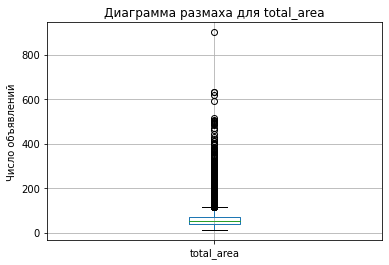

count   23650.00
mean        6.54
std        10.90
min         0.01
25%         3.40
50%         4.65
75%         6.80
max       763.00
Name: last_price, dtype: float64

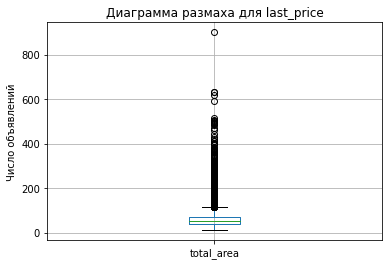

count   23650.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

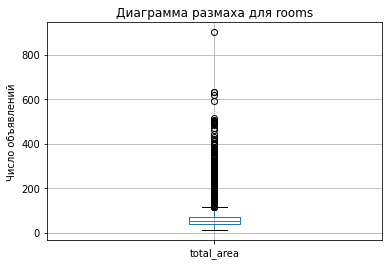

count   14490.00
mean        2.73
std         0.32
min         1.00
25%         2.51
50%         2.65
75%         2.80
max        14.00
Name: ceiling_height, dtype: float64

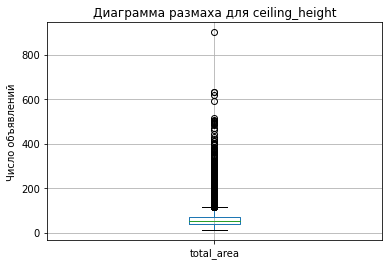

In [14]:
parameters = ['total_area', 'last_price', 'rooms', 'ceiling_height']
name = 'Диаграмма размаха для '
for parameter in parameters:
    display(df[parameter].describe())
    parameter = name + parameter
    df.boxplot(column='total_area').set_title(parameter)
    plt.ylabel('Число объявлений')
    plt.show()

Средние значения площади и цены довольно сильно расходятся с медианным. Самые популярные - квартиры с площадью около 50-60 кв м, ценой 4.5-6.5 млн, с двумя комнатами и высотой потолка 2.65-2.8 м. У площади, количества комнат и высоты потолка не очень большое стандартное отклонение. А вот по цене - приличное.

Выбросы по площади - выше 150 кв. м. Особенно редкие значения в 600-900 кв м.

По количеству комнат - то, что не попадает в интервал от 1 до 3.

И высота потолка - то, что не попадает в интервал от 2 до 3. Особенно странные значения в 8-14 метров.

По цене даже не видно границы, можно только сказать, что 763 млн совсем отбились от остальных, очень мало продаж от 200 до 400, а в пределах 200 млн ещё что-то есть. Может, это те же самые выбросы, что и по площади. Выведем данные по площадям от 350 кв.м. и построим диаграмму размаха в другом масштабе:

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,floor_type_word,living_area_ratio,kitchen_area_ratio
12971,19,763.00,400.00,2017-09-30,7,NaN,10,250.00,10,False,...,756.00,33,1907,5,9,2017,1.00,последний,0.62,NaN
19540,8,420.00,900.00,2017-12-06,12,2.80,25,409.70,25,False,...,318.00,106,466,2,12,2017,1.00,последний,0.46,0.12
14706,15,401.30,401.00,2016-02-20,5,NaN,9,204.00,9,False,...,478.00,393,1000,5,2,2016,1.00,последний,0.51,0.06
15651,20,300.00,618.00,2017-12-18,7,3.40,7,258.00,5,False,...,198.00,111,485,0,12,2017,0.50,другой,0.42,0.11
13749,7,240.00,410.00,2017-04-01,6,3.40,7,218.00,7,False,...,198.00,199,585,5,4,2017,1.00,последний,0.53,0.10
5893,3,230.00,500.00,2017-05-31,6,NaN,7,NaN,7,False,...,198.00,50,460,2,5,2017,1.00,последний,NaN,0.08
15016,8,150.00,500.00,2016-01-13,4,3.20,7,NaN,7,False,...,531.00,303,300,2,1,2016,1.00,последний,NaN,NaN
3117,19,140.00,631.00,2019-03-30,7,NaN,5,NaN,5,False,...,210.00,0,221,5,3,2019,1.00,последний,NaN,0.10
12859,20,140.00,631.20,2019-04-09,7,3.90,4,322.30,4,False,...,210.00,0,221,1,4,2019,1.00,последний,0.51,0.03
7674,20,131.00,380.00,2016-09-23,5,3.90,6,150.00,4,False,...,635.00,901,344,4,9,2016,0.50,другой,0.39,NaN


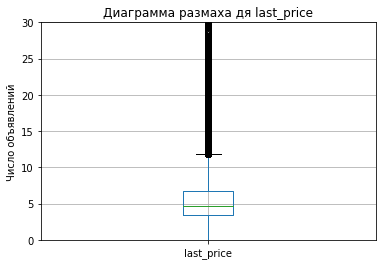

In [15]:
display(df.query('total_area > 350').sort_values(by='last_price', ascending=False))
df.boxplot(column='last_price').set_title('Диаграмма размаха дя last_price')
plt.ylabel('Число объявлений')
plt.ylim(0, 30)
plt.show()

Похоже, что выбросы по цене и площади совпадают.

Построим гистограмму площади:

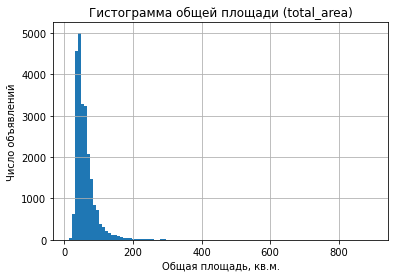

In [16]:
df['total_area'].hist(bins=100).set_title('Гистограмма общей площади (total_area)')
plt.xlabel('Общая площадь, кв.м.')
plt.ylabel('Число объявлений')
plt.show()

Получили малоинформативный результат. Почти нет квартир с площадью больше 200 кв м. Ограничим область построения до этого значения

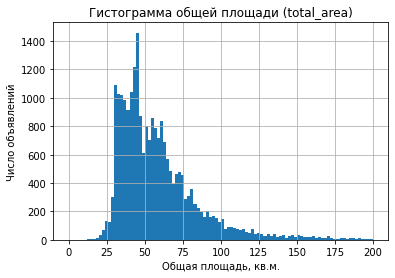

In [17]:
df['total_area'].hist(bins=100, range=(0, 200)).set_title('Гистограмма общей площади (total_area)')
plt.xlabel('Общая площадь, кв.м.')
plt.ylabel('Число объявлений')
plt.show()

Пока ничего странного не обнаружили для данного диапазона. Построим гистограму цен:

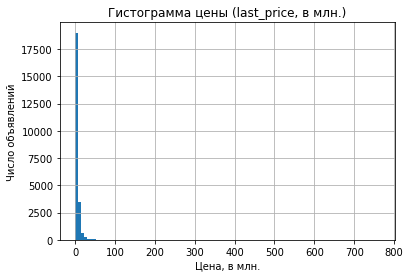

In [18]:
df['last_price'].hist(bins=100).set_title('Гистограмма цены (last_price, в млн.)')
plt.xlabel('Цена, в млн.')
plt.ylabel('Число объявлений')
plt.show()

Ограничим область гистограммы 50 миллионами:

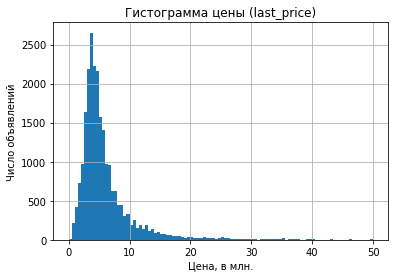

In [19]:
df['last_price'].hist(bins=100, range=(0,50)).set_title('Гистограмма цены (last_price)')
plt.xlabel('Цена, в млн.')
plt.ylabel('Число объявлений')
plt.show()

75% продаж укладывается в 6.8 млн, сузим область гистограммы до 20 млн

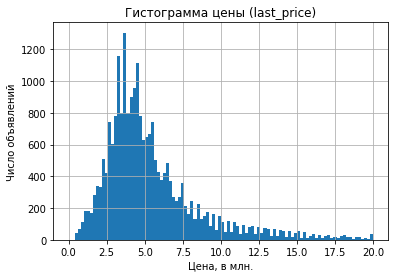

In [20]:
df['last_price'].hist(bins=100, range=(0,20)).set_title('Гистограмма цены (last_price)')
plt.xlabel('Цена, в млн.')
plt.ylabel('Число объявлений')
plt.show()

Есть выбросы, пока не понятно, с чем связанные, но их довольно много, и общую форму графика не сильно портят.

Построим гистограму числа комнат:

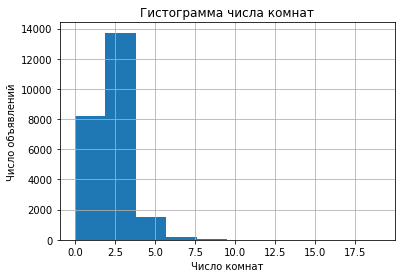

In [21]:
df['rooms'].hist().set_title('Гистограмма числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Число объявлений')
plt.show()

Ограничим область гистограммы 9 комнатами:

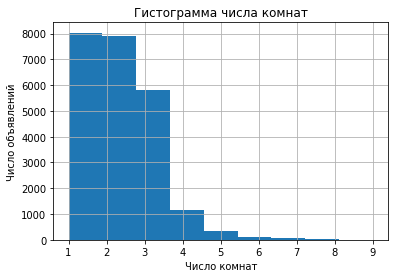

In [22]:
df['rooms'].hist(bins=9, range=(1,9)).set_title('Гистограмма числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Число объявлений')
plt.show()

Пока тоже без удивительных значений. 1-3 комнатные квартиры популярны. Построим гистограму высоты потолка:

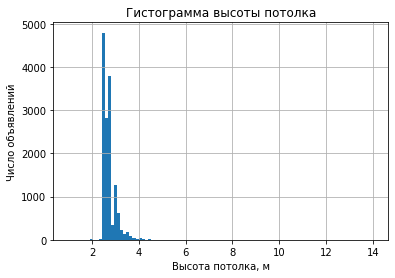

In [23]:
df['ceiling_height'].hist(bins=100).set_title('Гистограмма высоты потолка')
plt.xlabel('Высота потолка, м')
plt.ylabel('Число объявлений')
plt.show()

Ограничим область гистограммы диапазоном от 2 до 4 метров:

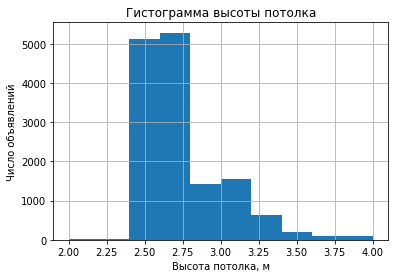

In [24]:
df['ceiling_height'].hist(range=(2,4)).set_title('Гистограмма высоты потолка')
plt.xlabel('Высота потолка, м')
plt.ylabel('Число объявлений')
plt.show()

Отбросим значения ниже 2.4 метра:

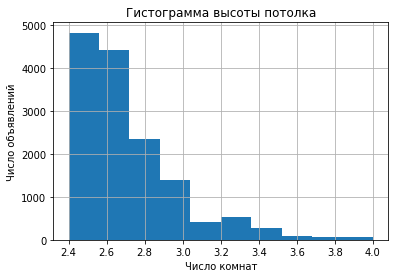

In [25]:
df['ceiling_height'].hist(range=(2.4,4)).set_title('Гистограмма высоты потолка')
plt.xlabel('Число комнат')
plt.ylabel('Число объявлений')
plt.show()

Посмотрим на данные по времени продажи квартиры. Сразу викинем нулевые значения, которые являются пропусками

In [26]:
display(df[df['days_exposition'] != 0]['days_exposition'].describe())

count   20470.00
mean      180.75
std       219.78
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

75% продаж происходят быстрее, чем за 231 день. Более долгие варианты могут быть связаны с неудобным расположением, ценой или ещё какими-то параметрами, которые исследуем в дальнейшем. 25% продаж укладываются в 45 дней. Построим гистограмму для всех продаж и для продаж в интервале до 200 дней:

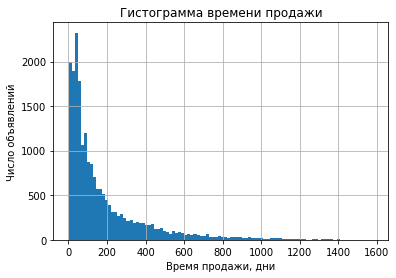

In [27]:
df[df['days_exposition'] != 0]['days_exposition'].hist(bins=100, range=(1,1580)).set_title('Гистограмма времени продажи')
plt.xlabel('Время продажи, дни')
plt.ylabel('Число объявлений')
plt.show()

До 200 дней:


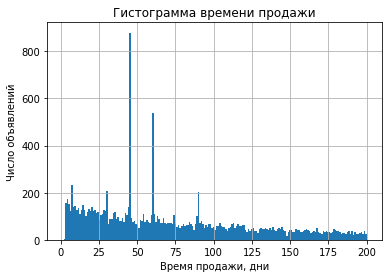

In [28]:
print('До 200 дней:')
df[df['days_exposition'] != 0]['days_exposition'].hist(bins=200, range=(1,200)).set_title('Гистограмма времени продажи')
plt.xlabel('Время продажи, дни')
plt.ylabel('Число объявлений')
plt.show()

Странные выбросы там, где, казалось бы, их быть не должно.

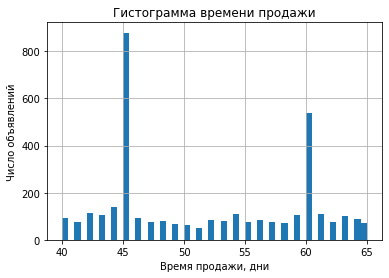

In [29]:
df[df['days_exposition'] != 0]['days_exposition'].hist(bins=50, range=(40,65)).set_title('Гистограмма времени продажи')
plt.xlabel('Время продажи, дни')
plt.ylabel('Число объявлений')
plt.show()

Что-то странное с продажами через 45 дней и через 60. Посмотрим подробнее на таблицу с df['days_exposition'] = 45:

In [30]:
display(df[df['days_exposition'] == 45])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,floor_type_word,living_area_ratio,kitchen_area_ratio
78,9,4.35,37.00,2018-02-22,1,NaN,19,18.00,6,False,...,NaN,45,117,3,2,2018,0.50,другой,0.49,0.29
89,9,2.50,63.00,2018-10-25,3,2.50,5,43.00,4,False,...,NaN,45,39,3,10,2018,0.50,другой,0.68,0.14
110,6,3.85,72.30,2017-09-29,2,NaN,3,27.40,2,False,...,NaN,45,53,4,9,2017,0.50,другой,0.38,0.33
153,12,4.35,55.00,2017-05-21,2,2.57,9,31.20,2,False,...,NaN,45,79,6,5,2017,0.50,другой,0.57,0.15
158,15,3.10,47.30,2017-11-07,2,NaN,5,27.50,2,False,...,NaN,45,65,1,11,2017,0.50,другой,0.58,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23601,10,2.90,43.40,2018-01-11,2,NaN,5,NaN,1,False,...,397.00,45,66,3,1,2018,0.00,первый,NaN,NaN
23613,4,3.95,52.00,2018-03-04,3,NaN,5,NaN,2,False,...,NaN,45,75,6,3,2018,0.50,другой,NaN,NaN
23670,9,2.45,45.60,2018-02-08,1,2.80,9,NaN,2,False,...,NaN,45,53,3,2,2018,0.50,другой,NaN,NaN
23679,0,2.50,35.00,2017-12-08,1,NaN,9,NaN,4,False,...,NaN,45,71,4,12,2017,0.50,другой,NaN,NaN


Пока не понятно. Будем иметь в виду в дальнейшем. 

Отфильтруем данные, исключив полученные выбросы, кроме выбросов в 'days_exposition':

In [31]:
df_filtered = df.query('total_area < 150 and 1 <= rooms <= 4  and last_price <= 200')
display(df_filtered)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,floor_type_word,living_area_ratio,kitchen_area_ratio
0,20,13.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,755.00,0,120,3,3,2019,0.50,другой,0.47,0.23
1,7,3.35,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,NaN,81,82,1,12,2018,0.00,первый,0.46,0.27
2,10,5.20,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,574.00,558,92,3,8,2015,0.50,другой,0.61,0.15
4,2,10.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,48.00,121,100,1,6,2018,0.50,другой,0.32,0.41
5,10,2.89,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,NaN,55,95,0,9,2018,0.50,другой,0.47,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.70,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,381.00,0,72,1,3,2017,0.50,другой,0.55,0.10
23695,14,3.10,59.00,2018-01-15,3,NaN,5,38.00,4,False,...,NaN,45,52,0,1,2018,0.50,другой,0.64,0.14
23696,18,2.50,56.70,2018-02-11,2,NaN,3,29.70,1,False,...,NaN,0,44,6,2,2018,0.00,первый,0.52,NaN
23697,13,11.47,76.75,2017-03-28,2,3.00,17,NaN,12,False,...,196.00,602,149,1,3,2017,0.50,другой,NaN,0.30


Посмотрим, как изменились характеристики параметров:

In [32]:
for parameter in parameters:
    display(df_filtered[parameter].describe())

count   22669.00
mean       56.16
std        22.00
min        12.00
25%        40.00
50%        51.00
75%        67.00
max       149.60
Name: total_area, dtype: float64

count   22669.00
mean        5.66
std         4.48
min         0.01
25%         3.40
50%         4.58
75%         6.50
max       124.00
Name: last_price, dtype: float64

count   22669.00
mean        1.99
std         0.89
min         1.00
25%         1.00
50%         2.00
75%         3.00
max         4.00
Name: rooms, dtype: float64

count   13877.00
mean        2.71
std         0.30
min         1.00
25%         2.50
50%         2.65
75%         2.80
max        14.00
Name: ceiling_height, dtype: float64

Число данных почти не уменьшилось (изначально было 23699, стало 22669), а статистические значения прилично поменялись. Средняя площадь с 60.33 уменьшилась до 56 кв. м., а цена уменьшилась примерно на 1 млн! И уменьшилось среднеквадратичное отклонение по ценам. Выкинутое небольшое количество данных сильно искажало общую картину. Однако и сейчас медиана цены сильно отличается от среднего.

Попробуем теперь выкинуть выбросы в 'days_exposition'. 

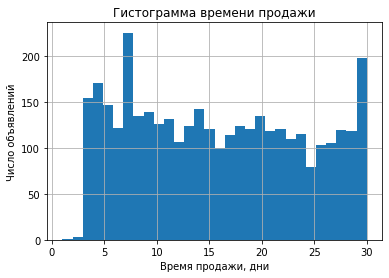

In [33]:
df_filtered_no_days = df_filtered.query('days_exposition != 45 and days_exposition != 60')
df_filtered_no_days['days_exposition'].hist(bins=30, range=(1,30)).set_title('Гистограмма времени продажи')
plt.xlabel('Время продажи, дни')
plt.ylabel('Число объявлений')
plt.show()

Видим ещё 3 выброса: на 7 дне, 30 и 90. Непонятно, с чем связаны такие "круглые" выбросы в 1 неделю, месяц, полтора месяца, 2 месяца и 3 месяца. Удалим ещё и их и посмотрим на статистические характеристики параметров:

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,floor_type_word,living_area_ratio,kitchen_area_ratio
0,20,13.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,755.00,0,120,3,3,2019,0.50,другой,0.47,0.23
1,7,3.35,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,NaN,81,82,1,12,2018,0.00,первый,0.46,0.27
2,10,5.20,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,574.00,558,92,3,8,2015,0.50,другой,0.61,0.15
4,2,10.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,48.00,121,100,1,6,2018,0.50,другой,0.32,0.41
5,10,2.89,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,NaN,55,95,0,9,2018,0.50,другой,0.47,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4.60,62.40,2016-08-05,3,2.60,9,40.00,8,False,...,675.00,239,73,4,8,2016,0.50,другой,0.64,0.13
23694,9,9.70,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,381.00,0,72,1,3,2017,0.50,другой,0.55,0.10
23696,18,2.50,56.70,2018-02-11,2,NaN,3,29.70,1,False,...,NaN,0,44,6,2,2018,0.00,первый,0.52,NaN
23697,13,11.47,76.75,2017-03-28,2,3.00,17,NaN,12,False,...,196.00,602,149,1,3,2017,0.50,другой,NaN,0.30


count   20673.00
mean       56.39
std        22.20
min        12.00
25%        40.00
50%        51.20
75%        67.60
max       149.60
Name: total_area, dtype: float64

count   20673.00
mean        5.71
std         4.47
min         0.01
25%         3.43
50%         4.60
75%         6.50
max       122.00
Name: last_price, dtype: float64

count   20673.00
mean        1.99
std         0.89
min         1.00
25%         1.00
50%         2.00
75%         3.00
max         4.00
Name: rooms, dtype: float64

count   12829.00
mean        2.71
std         0.30
min         1.00
25%         2.50
50%         2.65
75%         2.80
max        14.00
Name: ceiling_height, dtype: float64

count   17703.00
mean      192.66
std       223.70
min         1.00
25%        44.00
50%       112.00
75%       252.00
max      1580.00
Name: days_exposition, dtype: float64

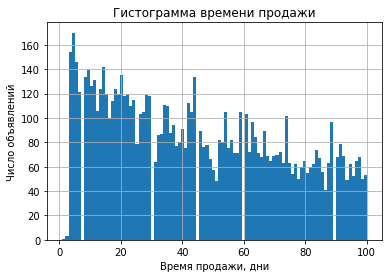

In [34]:
df_filtered_no_days = df_filtered_no_days.query('days_exposition != 7 and days_exposition != 30 and days_exposition != 90')
df_filtered_no_days['days_exposition'].hist(bins=100, range=(1,100)).set_title('Гистограмма времени продажи')
plt.xlabel('Время продажи, дни')
plt.ylabel('Число объявлений')
display(df_filtered_no_days)

for parameter in parameters:
    display(df_filtered_no_days[parameter].describe())
display(df_filtered_no_days[df_filtered_no_days['days_exposition'] != 0]['days_exposition'].describe())

Потеряли на этом еще примерно 2000 значений, а статистические характеристики по цене, площади, количеству комнат и высоте потолка почти не поменялись. Но среднее время продажи увеличилось до 192 дней, а медианное до 112 против 180 и 95. Думаю, стоит пока оставить эти странные выбросы в таблице. Возможно, они с чем-то интересным связаны. Однако, 75% продаж совершается быстрее 252 дней. Стоит отфильтровать ещё и слишком долгие продажи.

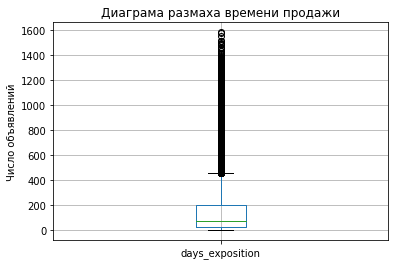

Осталось строк:  21050


count   21050.00
mean       55.67
std        21.60
min        12.00
25%        40.00
50%        50.80
75%        66.30
max       149.60
Name: total_area, dtype: float64

count   21050.00
mean        5.59
std         4.40
min         0.01
25%         3.40
50%         4.53
75%         6.45
max       124.00
Name: last_price, dtype: float64

count   21050.00
mean        1.97
std         0.88
min         1.00
25%         1.00
50%         2.00
75%         3.00
max         4.00
Name: rooms, dtype: float64

count   12831.00
mean        2.71
std         0.30
min         1.00
25%         2.50
50%         2.64
75%         2.80
max        14.00
Name: ceiling_height, dtype: float64

count   18080.00
mean      126.12
std       118.59
min         1.00
25%        41.00
50%        83.00
75%       180.00
max       499.00
Name: days_exposition, dtype: float64

In [35]:
df_filtered.boxplot(column='days_exposition').set_title('Диаграма размаха времени продажи')
plt.ylabel('Число объявлений')
plt.show()

df_filtered = df_filtered.query('days_exposition < 500')
print('Осталось строк: ',len(df_filtered))
for parameter in parameters:
    display(df_filtered[parameter].describe())
display(df_filtered[df_filtered['days_exposition'] != 0]['days_exposition'].describe())

Посмотрим, как зависит цена от площади. Построим график и посчитаем коэффициент корреляции:

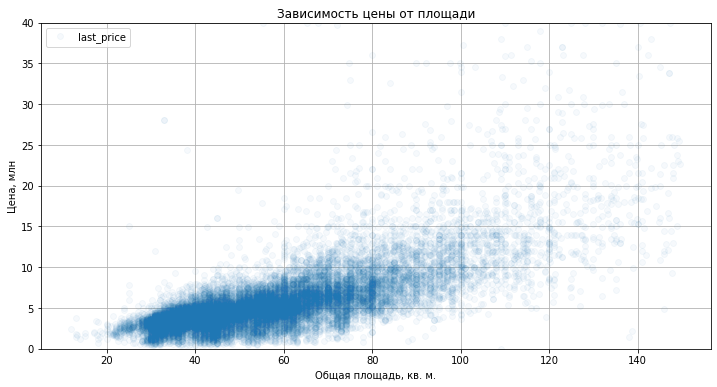

Корреляция цены и площади: 0.6946152984608315


In [36]:
#_, ax = plt.subplots()
#ax.plot(df_filtered, x='total_area', y='last_price', style='o', ylim=(0,40), alpha=0.04, grid=True, figsize=(12, 6), title='Зависимость цены от площади', xlabel='площадь, кв. м.')
df_filtered.plot(x='total_area', y='last_price', style='o', ylim=(0,40), alpha=0.04, grid=True, figsize=(12, 6), title='Зависимость цены от площади') #, xlabel='площадь, кв. м.'
plt.xlabel('Общая площадь, кв. м.')
plt.ylabel('Цена, млн')
plt.show()
print('Корреляция цены и площади:', df_filtered['total_area'].corr(df_filtered['last_price']))

Зависимость прилично сильная, с выраженным линейным участком на интервале до 10 млн и до 80 кв. м. Для больших значений площади всё больше проявляется разброс. Сделаем то же самое для числа комнат:

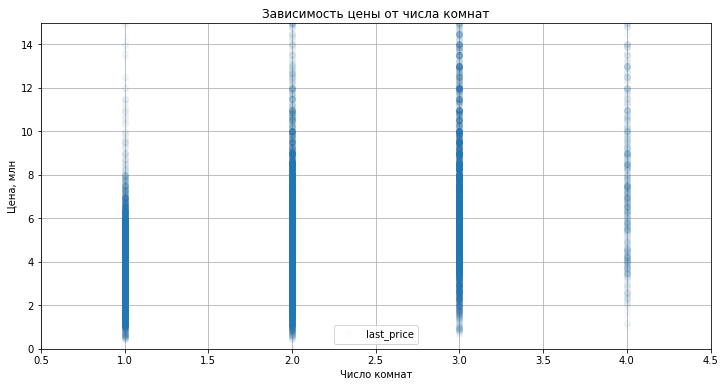

Корреляция числа комнат и цены: 0.38185283563542183


In [37]:
df_filtered.plot(x='rooms', y='last_price', style='o', xlim=(0.5,4.5), ylim=(0,15), alpha=0.02, grid=True, figsize=(12, 6), title='Зависимость цены от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Цена, млн')
plt.show()
print('Корреляция числа комнат и цены:', df_filtered['rooms'].corr(df_filtered['last_price']))

Корреляция не очень сильная. Однокомнатные и двухкомнатные квартиры самые дешёвые, как и ожидалось. Но почти нет однокомнатных дороже 7.5 млн, в то время как двухкомнатные есть, и не мало. 
Трёхкомнатные начинают появляться с более высоких цен и чуть дальше распределены в сторону удорожания. Однако, основная масса квартир (и однокомнатных, и двухкомнатных, и трёхкомнатных) распределена в области примерно от 2 до 7 млн. От 7 до 10 почти нет однокомнатных, но много двухкомнатных и трехкомнатных. От 10 до 14 мало двухкомнатных, но ещё есть трёхкомнатные. Четырёхкомнатных квартир мало, и они попадают в область примерно от 3 млн до 12.

Теперь посмотрим на зависимость цены от этажа:

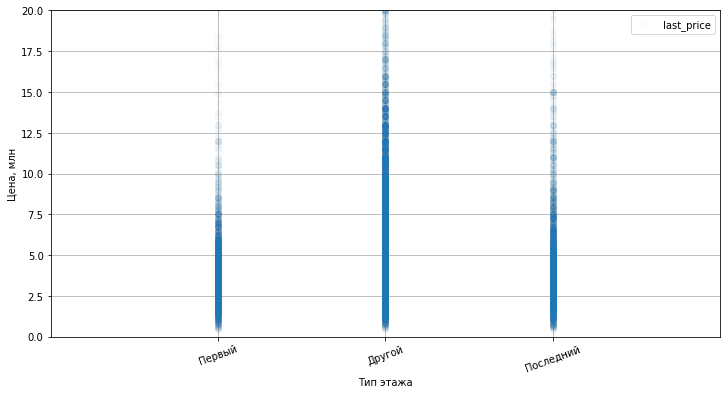

Корреляция типа этажа и цены: 0.04


In [38]:
df_filtered.plot(x='floor_type', y='last_price', xlim=(-0.5,1.5), ylim=(0,20), style='o', alpha=0.02, grid=True, figsize=(12, 6)) 
plt.xticks([0, 0.5, 1], ['Первый', 'Другой', 'Последний'], rotation=20)  # Set text labels and properties.
plt.xlabel('Тип этажа')
plt.ylabel('Цена, млн')
plt.show()
print('Корреляция типа этажа и цены:', df_filtered['floor_type'].corr(df_filtered['last_price']).round(decimals=2))

Посмотрим на среднюю цену в зависимости от типа этажа:

floor_type
0.00   4.40
0.50   5.86
1.00   5.17
Name: last_price, dtype: float64

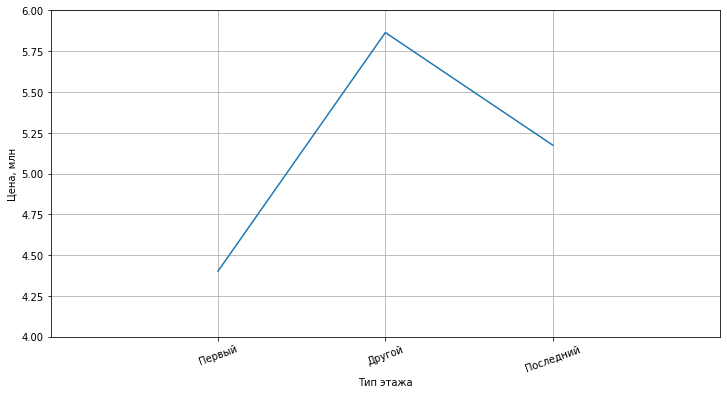

In [39]:
last_price_stat = df_filtered.groupby('floor_type')['last_price'].agg('mean')

display(last_price_stat)

last_price_stat.plot(xlim=(-0.5,1.5), ylim=(4,6), grid=True, figsize=(12, 6)) 
plt.xticks([0, 0.5, 1], ['Первый', 'Другой', 'Последний'], rotation=20)  # Set text labels and properties.
plt.xlabel('Тип этажа')
plt.ylabel('Цена, млн')
plt.show()

В среднем, квартиры не на первом и не на последнем этаже дороже. Выбирая из первого и последнего этажа, первый окажется в среднем дешевле.

До 7 млн покупают много квартиры на любом этаже, однако, чем квартиры дороже, тем предпочтительнее не первый и не последний этаж. Посмотрим теперь как влияет параметр "удалённость от центра города"

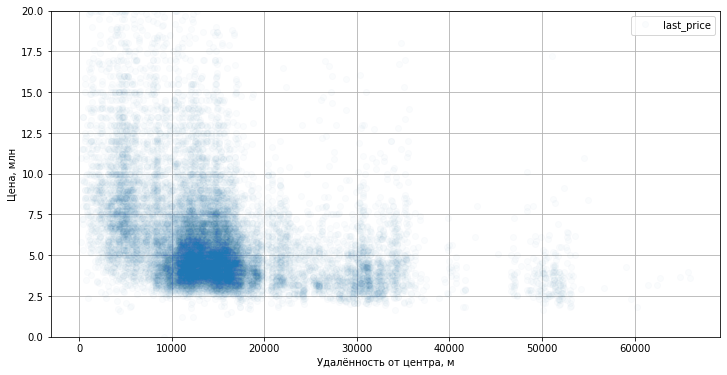

Корреляция удалённости от центра и цены: -0.30463262496860083


In [40]:
df_filtered.plot(x='city_centers_nearest', y='last_price', ylim=(0,20), style='o', alpha=0.02, grid=True, figsize=(12, 6))
plt.xlabel('Удалённость от центра, м')
plt.ylabel('Цена, млн')
plt.show()
print('Корреляция удалённости от центра и цены:', df_filtered['city_centers_nearest'].corr(df_filtered['last_price']))

Корреляция отрицательная. Не очень сильная, но всё же поближе к центру - лучше. Больше всего продается квартир от 10 до 19 км от центра за 2.5 - 6 млн. 
Однако, более дорогие квартиры сконцентрированы ближе к центру, и  почти нет вариантов дальше 20 км, в то время как для дешёвых квартир таких вариантов не так мало.

Посмотрим зависимости от даты размещения:

                    mean  median  count
weekday_exposition                     
3                   5.70    4.50   3740
1                   5.64    4.60   3721
0                   5.59    4.58   3233
4                   5.58    4.50   3579
2                   5.57    4.55   3516
5                   5.46    4.50   1739
6                   5.41    4.50   1522
Корреляция: -0.01


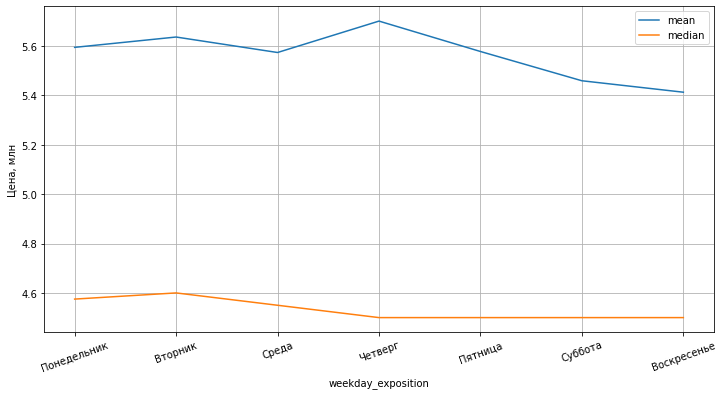

                  mean  median  count
month_exposition                     
8                 5.78    4.50   1585
4                 5.75    4.70   2161
11                5.66    4.60   2115
9                 5.66    4.59   1768
1                 5.63    4.50   1328
12                5.58    4.55   1404
2                 5.57    4.55   2381
7                 5.57    4.50   1501
3                 5.54    4.55   2279
6                 5.47    4.30   1537
10                5.41    4.50   1922
5                 5.39    4.40   1069
Корреляция: -0.0


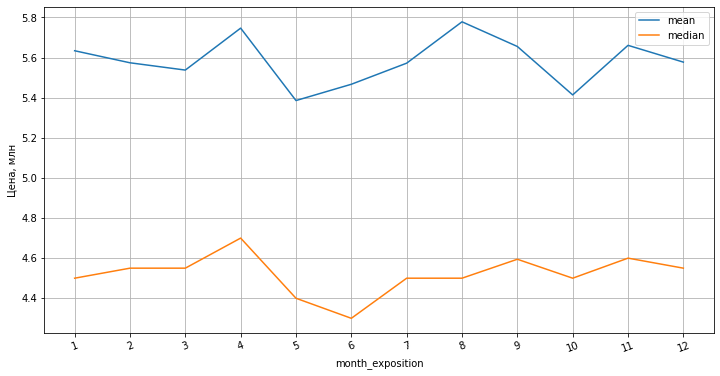

                 mean  median  count
year_exposition                     
2014            15.88   15.87     16
2015             6.31    4.89    479
2019             6.00    5.00   2779
2016             5.63    4.40   2056
2017             5.52    4.41   7492
2018             5.44    4.50   8228
Корреляция: -0.0


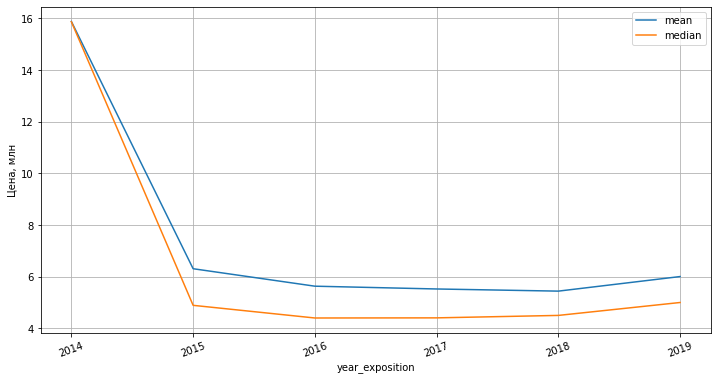

In [41]:
times = ['weekday_exposition', 'month_exposition', 'year_exposition']
xticks_for_times = [
                     [0, 1, 2, 3, 4, 5, 6], 
                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                     [2014, 2015, 2016, 2017, 2018, 2019]
                     ]
xticks_for_times_labels = [
                            ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'], 
                            ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
                            ['2014', '2015', '2016', '2017', '2018', '2019']
                            ]
for i in range(len(times)):
    print(df_filtered.groupby(times[i])['last_price'].agg({'count', 'median', 'mean'}).sort_values(by='mean', ascending=False))
    print('Корреляция:', df_filtered[times[i]].corr(df_filtered['last_price']).round(decimals=2))
    title_str = 'Зависимость ' + 'last_price' + ' от ' + times[i]
    last_price_days = df_filtered.groupby(times[i])['last_price'].agg(['mean', 'median'])
    last_price_days.plot(grid=True, figsize=(12, 6)) 
    plt.xticks(xticks_for_times[i], xticks_for_times_labels[i], rotation=20)  # Set text labels and properties.
    plt.ylabel('Цена, млн')
    plt.show()

Корреляция цены с днём недели, месяцем и годом почти нулевая. Квартиры, размещеные в субботу и воскресенья, покупают реже, чем размещенные в будни, и в среднем они дешевле. Но медиана примерно совпадает. И в мае "спад" продаж и средней цены. Лучше - в августе и апреле, но и здесь медиана не особо меняется. Основной пик продаж пришёлся на 2017-2018 года. 2019й отметился скачком средней цены и медианы примерно на 500тыс рублей. За 2014 и 2015 года довольно мало данных для оценки. Предположительно, в 2015 году действительно было мало продаж, а 16 продаж за 2016 лучше отбросить из рассмотрения.

Построим для цены за квадратный метр:

In [42]:
def df_grouped_category(df_filtered, df_column_1, df_column_2, y_lim_range, ylabel):
    """
    Формирует таблицу для определенного параметра (столбца таблицы df_column_1), сгруппированного по его значениям, 
    с подсчетом:
    общего количества продаж ('count'), 
    средней цены ('mean') и
    медианной цены ('median').
    
    В качестве df_column_2 - цена или цена за квадратный метр.
    
    Сортирует эту таблицу по среднему значению.
    
    Считает корреляцию для этого столбца с ценой продажи.
    
    Выводит график зависимости цены от этого параметра.
    """
    title_str = 'Зависимость ' + df_column_2 + ' от ' + df_column_1
    df_filtered.plot(x=df_column_1, y=df_column_2, ylim=y_lim_range, style='o', alpha=0.05, grid=True, figsize=(12, 6), title = title_str) 
    plt.ylabel(ylabel)
    print(df_filtered.groupby(df_column_1)[df_column_2].agg({'count', 'median', 'mean'}).sort_values(by='mean', ascending=False))
    print('Корреляция:', df_filtered[df_column_1].corr(df_filtered[df_column_2]).round(decimals=2))

                    mean  median  count
weekday_exposition                     
3                  97.18   94.00   3740
1                  97.15   95.00   3721
2                  97.01   95.00   3516
0                  96.76   94.00   3233
4                  96.45   94.00   3579
6                  95.54   94.00   1522
5                  94.99   93.00   1739
Корреляция: -0.01
                  mean  median  count
month_exposition                     
4                99.00   96.00   2161
8                98.28   96.00   1585
9                97.37   95.00   1768
3                97.12   95.00   2279
1                96.87   94.00   1328
11               96.71   94.00   2115
7                96.44   94.00   1501
2                95.96   94.00   2381
6                95.37   92.00   1537
10               95.23   93.00   1922
12               95.23   93.00   1404
5                95.18   92.00   1069
Корреляция: -0.01
                  mean  median  count
year_exposition                   

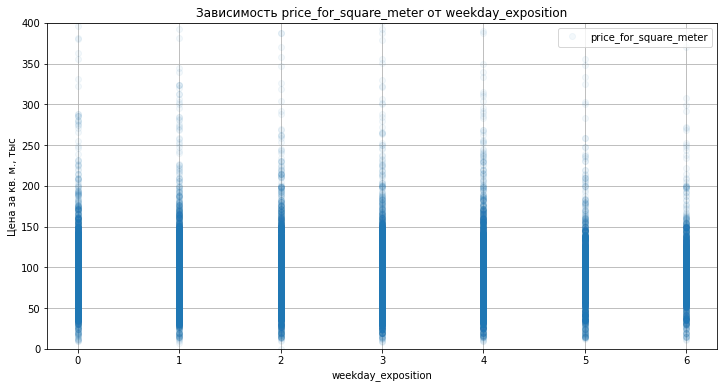

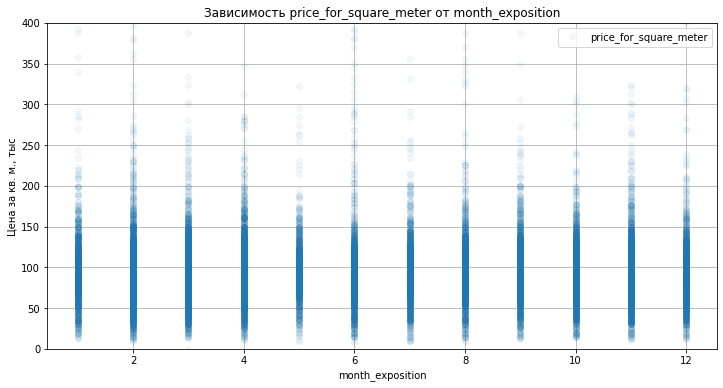

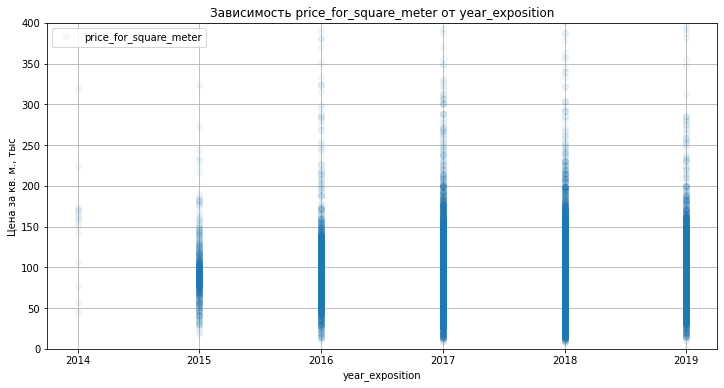

In [43]:
df_grouped_category(df_filtered, 'weekday_exposition', 'price_for_square_meter', (0, 400), 'Цена за кв. м., тыс')
df_grouped_category(df_filtered, 'month_exposition', 'price_for_square_meter', (0, 400), 'Цена за кв. м., тыс')
df_grouped_category(df_filtered, 'year_exposition', 'price_for_square_meter', (0, 400), 'Цена за кв. м., тыс')

Получили схожий результат для цены за квадратный метр. 

Рассмотрим подробнее ситуацию в зависимости от населенного пункта. Выделим 10 населенных пунктов с наибольшим числом объявлений:

                   count  mean_price_for_meter  median_price_for_meter
locality_name                                                         
Санкт-Петербург    13791                111.66                  104.00
посёлок Мурино       463                 84.82                   84.00
посёлок Шушары       411                 77.88                   76.00
Всеволожск           360                 68.23                   65.00
Пушкин               331                102.41                   99.00
Колпино              320                 74.89                   74.00
посёлок Парголово    307                 89.75                   91.00
Гатчина              282                 68.50                   67.00
деревня Кудрово      251                 91.92                   91.00
Выборг               219                 57.68                   58.00


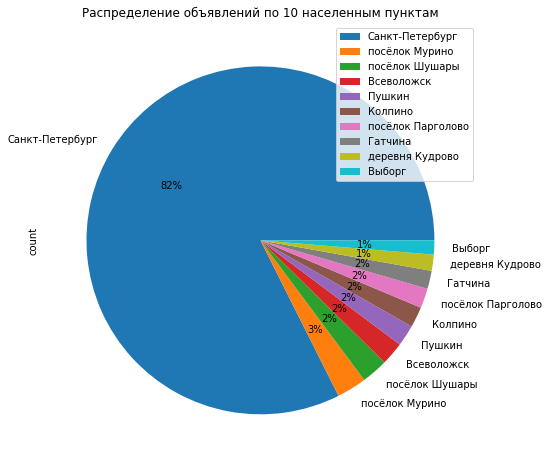

In [44]:
locality_stat = df_filtered.pivot_table(
    index='locality_name', values='price_for_square_meter', aggfunc=['count', 'mean', 'median']
)
locality_stat.columns = ['count', 'mean_price_for_meter', 'median_price_for_meter']
locality_stat = locality_stat.sort_values(by='count', ascending=False)
locality_stat = locality_stat[0:10]
print(locality_stat)

locality_stat.plot(y='count', kind='pie', figsize=(8,8), autopct='%1.0f%%', title = 'Распределение объявлений по 10 населенным пунктам')
plt.show()


Посчитали среднее и медиану цены за кв. м. Дороже всего - в Санкт-Петербурге (111.66 тыс). Но Пушкин не сильно отстает (102.41 тыс). Дешевле всего в Выборге (57.68). Медиана больше всего отличается от среднего для более "дорогих" населенных пунктов.

82% продаж среди ТОП-10 населенных пунктов выпадает на Санкт-Петербург. Ожидалось, что там будет много, но 82% - значительно больше, чем по 1-3% на каждый из 9 других населенных пунктов. Имеет смысл сконцентрироваться на северной столице.

Выделим квартиры в Санкт-Петербурге в отдельную таблицу:

In [45]:
df_spb = df_filtered.query('locality_name == "Санкт-Петербург"')
df_spb['city_centers_nearest_km'] = df_spb['city_centers_nearest'] / 1000
df_spb['city_centers_nearest_km'] = df_spb['city_centers_nearest_km'].round()
df_spb.dropna(subset = ['city_centers_nearest_km'], inplace=True)
df_spb['city_centers_nearest_km'].astype(int)
display(df_spb[['city_centers_nearest' ,'city_centers_nearest_km']])

C:\Users\Admin\AppData\Local\Temp/ipykernel_7544/220778909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['city_centers_nearest_km'] = df_spb['city_centers_nearest'] / 1000
C:\Users\Admin\AppData\Local\Temp/ipykernel_7544/220778909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['city_centers_nearest_km'] = df_spb['city_centers_nearest_km'].round()
c:\users\admin\miniconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy

,city_centers_nearest,city_centers_nearest_km
0,16028.00,16.00
4,8098.00,8.00
7,11634.00,12.00
9,15008.00,15.00
10,13878.00,14.00
...,...,...
23687,16704.00,17.00
23688,14428.00,14.00
23689,16081.00,16.00
23690,6263.00,6.00


Посчитаем среднюю цену квартиры для каждого километра. Таблицу отсортирует по среднему значению. Построим графики:

,mean,median,count
city_centers_nearest_km,,,
0.00,19.00,11.25,16
2.00,12.17,9.20,219
1.00,11.83,10.00,126
7.00,11.34,7.00,353
6.00,10.78,8.00,477
5.00,10.38,8.50,668
4.00,9.66,8.30,494
3.00,9.07,7.90,263
27.00,8.30,8.30,2


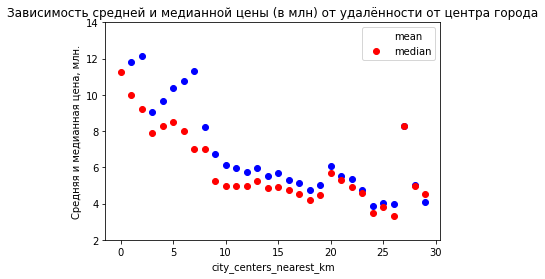

In [46]:
df_spb_grouped_price = df_spb.groupby('city_centers_nearest_km')['last_price'].agg({'count', 'median', 'mean'}).sort_values(by='mean', ascending=False)
df_spb_grouped_price_for_meter = df_spb.groupby('city_centers_nearest_km')['price_for_square_meter'].agg({'count', 'median', 'mean'}).sort_values(by='mean', ascending=False)

display(df_spb_grouped_price)
df_spb_grouped_price['mean'].plot(ylim=(2,14), style='bo', legend='mean', title = 'Зависимость средней и медианной цены (в млн) от удалённости от центра города')
df_spb_grouped_price['median'].plot(style='ro', legend='median')
plt.ylabel('Средняя и медианная цена, млн.')
plt.show()

Средняя цена уменьшается в зависимости от удаленности от центра. В пределах 3-8 км наблюдаем обратную зависимость. Для медианы  всё предсказуемо падает с нарастанием удалённости, и видна граница центральной зоны - 8 км. Выделим этот сегмент в отдельную таблицу и посмотрим на статистические характеристики в сравнении с такими же характеристиками по всему городу:

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_for_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,floor_type_word,living_area_ratio,kitchen_area_ratio,city_centers_nearest_km
4,2,10.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,121,100,1,6,2018,0.50,другой,0.32,0.41,8.00
24,8,6.50,97.20,2015-10-31,2,NaN,3,46.50,1,False,...,265,66,5,10,2015,0.00,первый,0.48,0.20,2.00
63,2,20.00,118.00,2018-09-11,3,3.00,9,68.00,7,False,...,37,169,1,9,2018,0.50,другой,0.58,0.14,5.00
70,9,3.40,30.00,2018-09-05,1,NaN,5,16.00,1,False,...,14,113,2,9,2018,0.00,первый,0.53,0.23,8.00
94,3,3.50,29.50,2019-04-26,1,2.50,5,15.60,2,False,...,4,118,4,4,2019,0.50,другой,0.53,0.19,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23644,7,4.99,62.50,2018-04-26,2,2.70,4,32.30,4,False,...,166,79,3,4,2018,1.00,последний,0.52,0.19,4.00
23665,11,4.25,47.00,2016-05-20,1,NaN,6,18.20,1,False,...,131,90,4,5,2016,0.00,первый,0.39,0.31,5.00
23681,13,5.25,43.00,2018-05-11,2,2.50,5,29.00,2,False,...,80,122,4,5,2018,0.50,другой,0.67,0.14,7.00
23690,3,5.50,52.00,2018-07-19,2,NaN,5,31.00,2,False,...,15,105,3,7,2018,0.50,другой,0.60,0.12,6.00


В центре:


count   3121.00
mean      72.86
std       27.54
min       12.00
25%       51.00
50%       70.00
75%       90.80
max      149.30
Name: total_area, dtype: float64

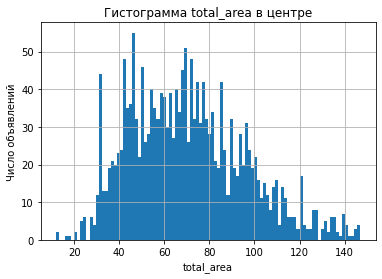

По всему городу:


count   13744.00
mean       58.21
std        23.16
min        12.00
25%        41.01
50%        53.00
75%        70.00
max       149.60
Name: total_area, dtype: float64

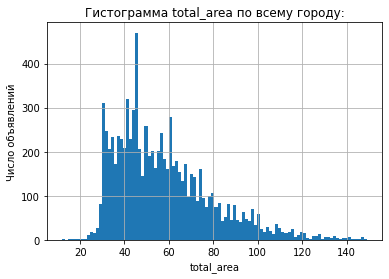

В центре:


count   3121.00
mean      10.20
std        7.89
min        1.60
25%        6.00
50%        8.10
75%       11.50
max      124.00
Name: last_price, dtype: float64

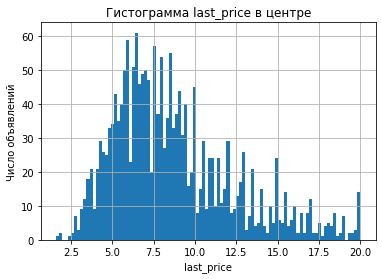

По всему городу:


count   13744.00
mean        6.70
std         4.89
min         0.01
25%         4.15
50%         5.30
75%         7.50
max       124.00
Name: last_price, dtype: float64

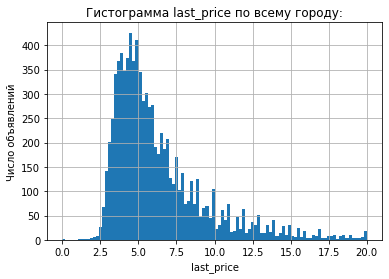

В центре:


count   3121.00
mean       2.38
std        0.92
min        1.00
25%        2.00
50%        2.00
75%        3.00
max        4.00
Name: rooms, dtype: float64

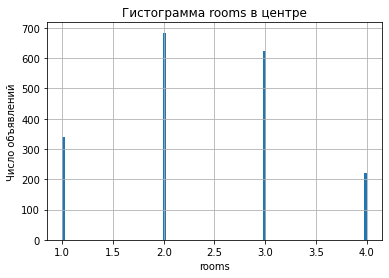

По всему городу:


count   13744.00
mean        2.04
std         0.90
min         1.00
25%         1.00
50%         2.00
75%         3.00
max         4.00
Name: rooms, dtype: float64

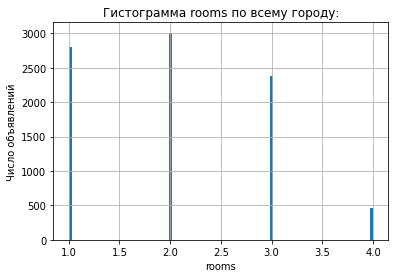

В центре:


count   2020.00
mean       3.01
std        0.38
min        2.00
25%        2.75
50%        3.00
75%        3.20
max       10.00
Name: ceiling_height, dtype: float64

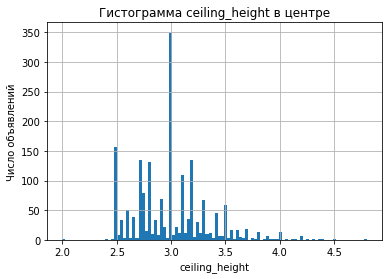

По всему городу:


count   8826.00
mean       2.74
std        0.32
min        1.00
25%        2.54
50%        2.65
75%        2.80
max       14.00
Name: ceiling_height, dtype: float64

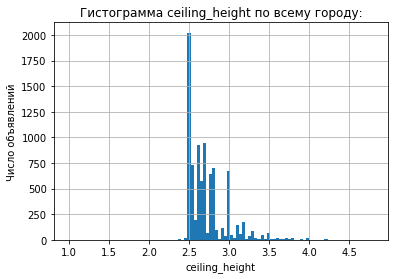

In [47]:
df_spb_center = df_spb.query('city_centers_nearest_km <= 8')
display(df_spb_center)

for parameter in parameters:
    print('В центре:')
    display(df_spb_center[parameter].describe())
    title_str = 'Гистограмма ' + parameter + ' в центре'
    df_spb_center[(df_spb_center['last_price'] <= 20) & (df_spb_center['ceiling_height'] <= 5)][parameter].hist(bins=100).set_title(title_str)
    plt.xlabel(parameter)
    plt.ylabel('Число объявлений')
    plt.show()
    print('По всему городу:')
    display(df_spb[parameter].describe())
    title_str = 'Гистограмма ' + parameter + ' по всему городу:'
    df_spb[(df_spb['last_price'] <= 20) & (df_spb['ceiling_height'] <= 5)][parameter].hist(bins=100).set_title(title_str)
    plt.xlabel(parameter)
    plt.ylabel('Число объявлений')
    plt.show()

Возросла средняя площадь с 58.21 кв м. до 72.86. Средняя цена с 6.70 млн до 10.20. Высота потолков в центре в среднем выше - целых 3 метра. Среднее по числу комнат чуть-чуть выше, чем по всем данным, но всё равно округляется до 2. 

Гистограммы по всему городу для цены и площади смещены влево, если сравнивать с гистограмами для центра, что неудивительно, и отображают, что по всему городу чаще покупают более дешёвые квартиры с меньшей площадью.

Посмотрим, как быстро продаются квартиры в центре в сравнении со всем городом:

По всему Санкт-Петербургу:


count   11872.00
mean      124.44
std       118.18
min         1.00
25%        37.00
50%        83.00
75%       177.00
max       499.00
Name: days_exposition, dtype: float64

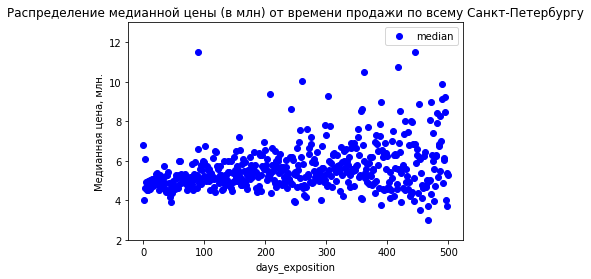

В центральной зоне:


count   2589.00
mean     142.52
std      125.77
min        3.00
25%       43.00
50%       98.00
75%      211.00
max      497.00
Name: days_exposition, dtype: float64

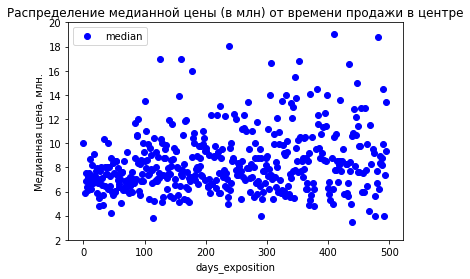

In [48]:
df_spb_grouped_days = df_spb.groupby('days_exposition')['last_price'].agg({'count', 'median', 'mean'}).sort_values(by='mean', ascending=False)
df_spb_center_grouped_days = df_spb_center.groupby('days_exposition')['last_price'].agg({'count', 'median', 'mean'}).sort_values(by='mean', ascending=False)

print('По всему Санкт-Петербургу:')
display(df_spb[df_spb['days_exposition'] != 0]['days_exposition'].describe())
df_spb_grouped_days['median'].plot(ylim=(2,13), style='bo', legend='median', title = 'Распределение медианной цены (в млн) от времени продажи по всему Санкт-Петербургу')
plt.ylabel('Медианная цена, млн.')
plt.show()

print('В центральной зоне:')
display(df_spb_center[df_spb_center['days_exposition'] != 0]['days_exposition'].describe())
df_spb_center_grouped_days['median'].plot(ylim=(2,20), style='bo', legend='median', title = 'Распределение медианной цены (в млн) от времени продажи в центре')
plt.ylabel('Медианная цена, млн.')
plt.show()

По всему городу в среднем продажа осуществляется через 124 дня, а в центре - через 142. Медианы - 83 и 98 для всего города и центра соответственно. Распределение медианной цены от времени продажи по всему городу помещается в интервале от 4 до 6 млн, расширяясь с увеличением числа дней - чтобы продать дорого квартиру не в центре, придётся долго ждать. В центре распределение размазано, и дорогие квартиры покупаются быстрее. 

Посмотрим на корреляцию разных параметров с ценой:

In [49]:
parameters = ['rooms', 'floor_type', 'city_centers_nearest_km']
for parameter in parameters:
    print('Параметр: ', parameter)
    print('Корреляция:', df_spb[parameter].corr(df_spb['last_price']).round(decimals=2))
    print('Корреляция в центре:', df_spb_center[parameter].corr(df_spb_center['last_price']).round(decimals=2))
    print()

Параметр:  rooms
Корреляция: 0.4
Корреляция в центре: 0.3

Параметр:  floor_type
Корреляция: 0.05
Корреляция в центре: 0.06

Параметр:  city_centers_nearest_km
Корреляция: -0.36
Корреляция в центре: -0.08



Корреляция параметров по городу


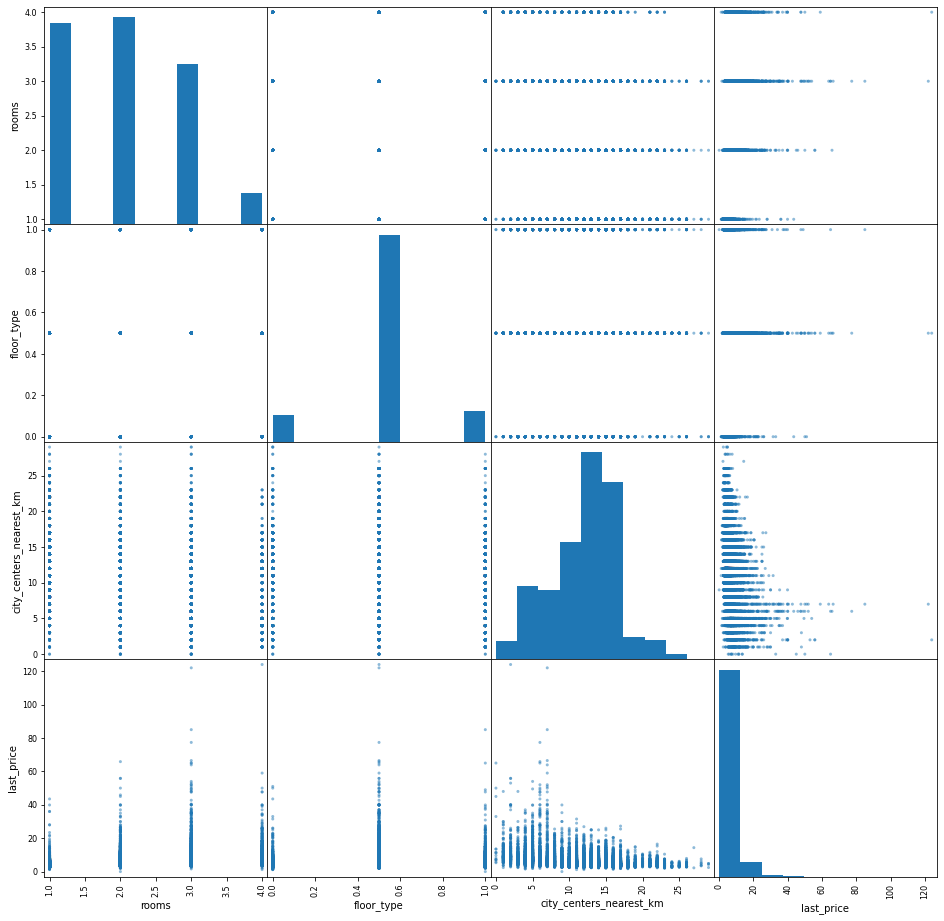

In [50]:
print('Корреляция параметров по городу')
pd.plotting.scatter_matrix(df_spb[['rooms', 'floor_type', 'city_centers_nearest_km','last_price']], figsize=(16, 16))
plt.show()

Корреляция параметров в центре


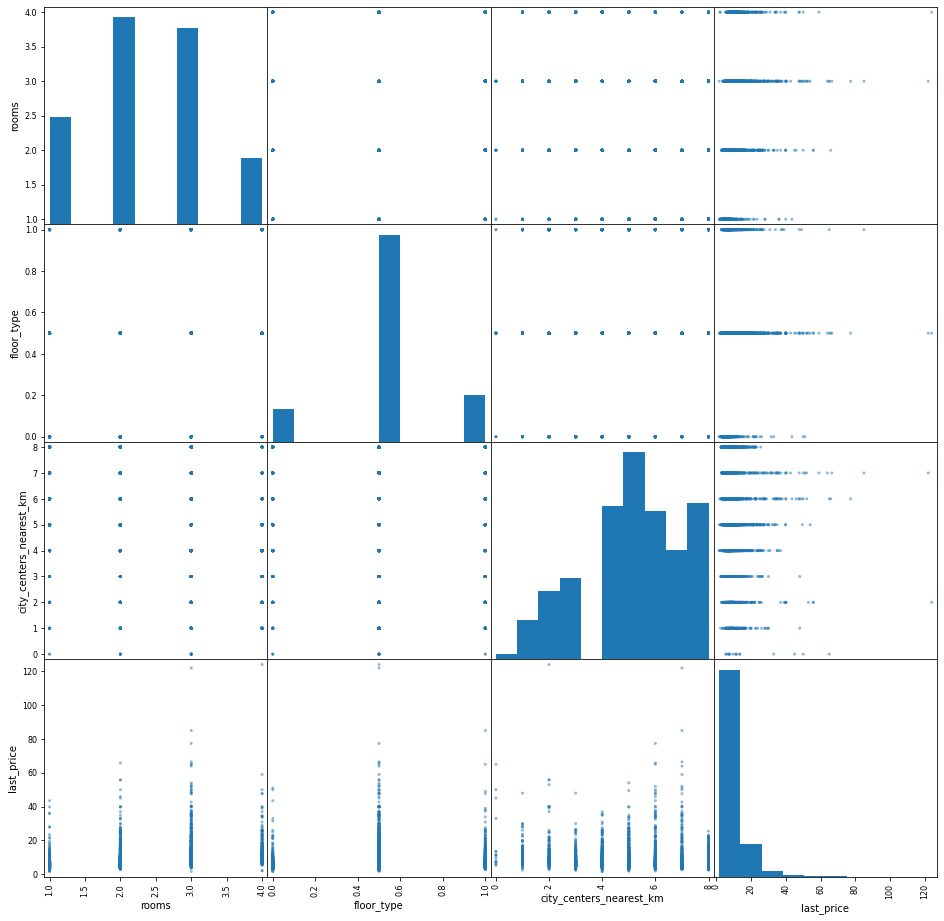

In [51]:
print('Корреляция параметров в центре')
pd.plotting.scatter_matrix(df_spb_center[['rooms', 'floor_type', 'city_centers_nearest_km','last_price']], figsize=(16, 16))
plt.show()

 Корреляция количества комнат и цены чуть выше по всему городу, чем по центру - для жителей центра число комнат в меньшем приоритете. 
 
 Корреляция типа этажа не существенна.
 
 Корреляция цены и удалённости от центра ощущается по всему городу (коэффициент равен -0.36 - чем ближе к центру, тем дороже), а по центру - не существенна (-0.08). 
 
 Посмотрим, как зависит цена от даты размещения:

По всему Санкт-Петербургу:
                    mean  median  count
weekday_exposition                     
3                   6.91    5.40   2420
0                   6.73    5.40   2084
1                   6.70    5.30   2481
4                   6.65    5.30   2357
5                   6.64    5.30   1106
2                   6.61    5.30   2323
6                   6.56    5.30    973
Корреляция: -0.01


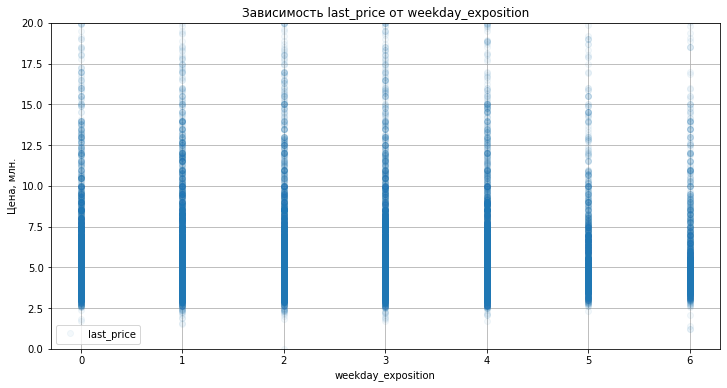

In [52]:
print('По всему Санкт-Петербургу:')
df_grouped_category(df_spb, 'weekday_exposition', 'last_price', (0,20), 'Цена, млн.')

В центральной зоне:
                    mean  median  count
weekday_exposition                     
3                  10.55    7.85    596
6                  10.32    8.50    184
0                  10.28    8.30    477
1                  10.22    8.00    538
4                  10.12    8.20    550
2                  10.00    8.28    532
5                   9.69    7.80    244
Корреляция: -0.01


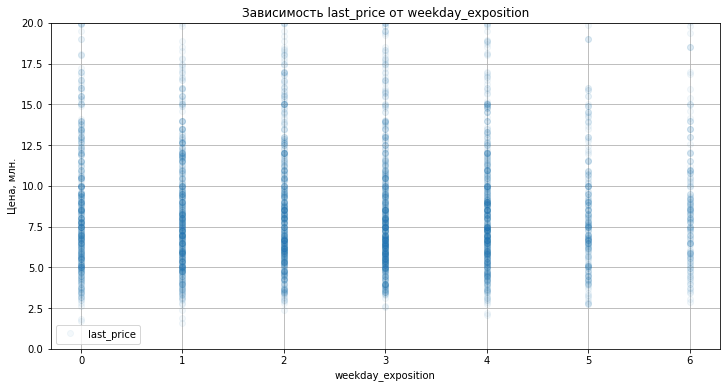

In [53]:
print('В центральной зоне:')
df_grouped_category(df_spb_center, 'weekday_exposition', 'last_price', (0,20), 'Цена, млн.')

Средняя цена сильно различается для центральной зоны среди недели (10.55 млн в четверг и 9.69 в субботу). Для всего города 6.91 в четверг и 6.56 в воскресенье. В среднем, размещенные в четверг объявления - более дорогие для всего города и для центра. Так же любопытно, что воскресенье для всего города на последнем месте, а для центра - на втором. 

Посмотрим на зависимость от месяца:

По всему Санкт-Петербургу:
                  mean  median  count
month_exposition                     
1                 6.91    5.50    807
8                 6.85    5.38   1078
12                6.83    5.60    871
4                 6.82    5.45   1460
9                 6.75    5.35   1171
11                6.74    5.39   1389
2                 6.73    5.35   1539
3                 6.69    5.50   1455
6                 6.65    5.15    977
7                 6.61    5.25   1006
10                6.41    5.14   1280
5                 6.39    5.15    711
Корреляция: -0.01


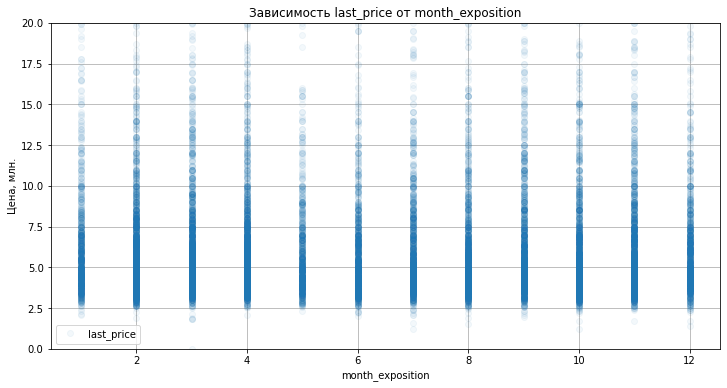

In [54]:
print('По всему Санкт-Петербургу:')
df_grouped_category(df_spb, 'month_exposition', 'last_price', (0,20), 'Цена, млн.')

В центральной зоне:
                  mean  median  count
month_exposition                     
8                10.87    8.10    257
6                10.77    8.10    243
1                10.57    8.30    181
4                10.50    8.04    313
11               10.48    8.35    308
2                10.47    8.00    322
3                10.12    8.30    337
7                10.11    8.40    247
9                 9.81    8.50    282
5                 9.58    7.78    170
12                9.42    7.09    204
10                9.36    7.80    257
Корреляция: -0.02


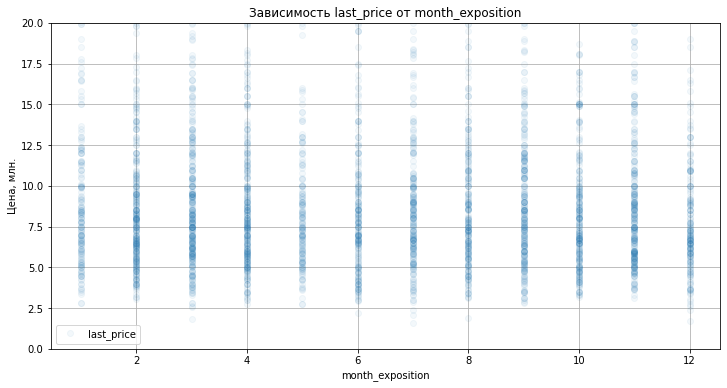

In [55]:
print('В центральной зоне:')
df_grouped_category(df_spb_center, 'month_exposition', 'last_price', (0,20), 'Цена, млн.')

Май и октябрь - для обеих групп месяца с настроениями "подешевле" продать квартиру (вероятно, с рассчётом побыстрее). В декабре центральная зона в тех же настроениях, а весь город оптимистичен и устанавливает немаленькую цену. В августе и январе обе группы дорого оценивают своё имущество.

Посмотрим на характеристики по годам:

По всему Санкт-Петербургу:
                 mean  median  count
year_exposition                     
2014            18.65   17.80     13
2015             7.45    5.50    329
2019             7.11    5.79   1884
2016             6.70    5.20   1380
2018             6.63    5.39   5148
2017             6.54    5.15   4990
Корреляция: 0.0


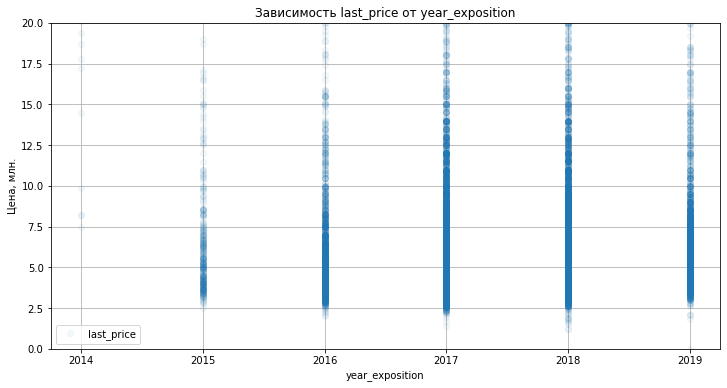

In [56]:
print('По всему Санкт-Петербургу:')
df_grouped_category(df_spb, 'year_exposition', 'last_price', (0,20), 'Цена, млн.')

В центральной зоне:
                 mean  median  count
year_exposition                     
2014            45.90   45.90      1
2015            11.35    8.30     99
2019            10.98    8.40    387
2016            10.75    8.30    359
2017            10.05    7.90   1166
2018             9.78    8.00   1109
Корреляция: -0.02


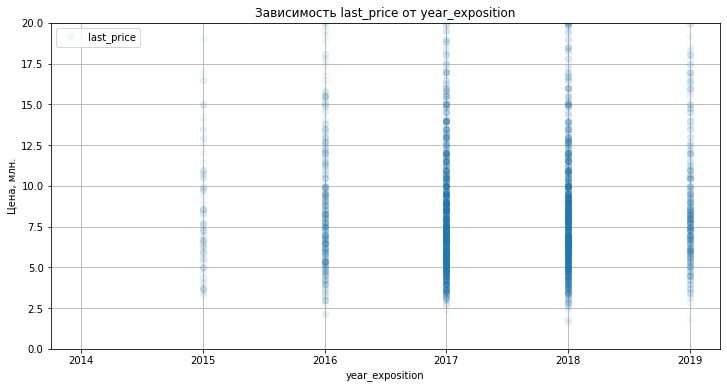

In [57]:
print('В центральной зоне:')
df_grouped_category(df_spb_center, 'year_exposition', 'last_price', (0,20), 'Цена, млн.')

Почти ничем не отличаются центр и весь город. 2017-2018 года для обеих групп были периодом спада цен, но в центре в 2018 году была минимальная средняя цена, подскочившая в 2019 году на 12%.

## Общий вывод

Построив гистограммы и диаграммы размаха для цены, площади, количества комнат, высоты потолка и дней до продажи, отбросили редкие значения. Довольно сильно расходятся среднее и медианное значение цены (5.59 и 4.53 млн соответственно). Средняя площадь равна 55.67 кв м., медианная 50.8, тоже немаленькая разница, но не так существенна. В основном, покупают 1-3-комнатные квартиры с высотой потолков около 2.7 м.

Квартиры, размещеные в субботу и воскресенья, покупают реже, чем размещенные в будни, и в среднем они дешевле. В мае "спад" продаж и средней цены. Лучше - в августе и апреле. Основной пик продаж пришёлся на 2017-2018 года. 2019й отметился скачком средней цены и медианы примерно на 500тыс рублей.

В среднем, квартиры не на первом и не на последнем этаже дороже. Выбирая из первого и последнего этажа, первый окажется в среднем дешевле.

Квадратный метр дороже всего - в Санкт-Петербурге (111.66 тыс). Дешевле всего в Выборге (57.68).

Далее о ситуации в Санкт-Петербурге, на который приходится большинство продаж (82% среди ТОП-10 населенных пунктов по числу продаж).

Средняя цена уменьшается в зависимости от удаленности от центра. В центральной зоне (в пределах 8 км от центра) средняя площадь почти 73 кв. м., а по всему городу 58 . Средняя цена с 6.70 млн до 10.20. Высота потолков в центре в среднем выше, чем по всему городу, - целых 3 метра.

В среднем, размещенные в четверг объявления - более дорогие для всего города и для центра. Так же любопытно, что воскресенье для всего города на последнем месте, а для центра - на втором.

Почти ничем не отличаются центр и весь город. 2017-2018 года для обеих групп были периодом спада цен, но в центре в 2018 году была минимальная средняя цена, подскочившая в 2019 году на 12%. В то время как во всем городе скачок за это же время был 7%.

Насчёт странных выбросов в days_exposition ничего выяснить не удалось. Ничем такие квартиры не выделяются, дублей не замечено. Возможно, это тот случай, который попадает под баг-репорт.